In [1]:
!pip install mediapipe opencv-python pandas scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 1.2 MB/s 


In [2]:
# import the necessary packages

from zipfile import ZipFile
from matplotlib import pyplot as plt
from imutils import face_utils
import numpy as np
import argparse
import imutils
import mediapipe as mp
import os
import sys
import os,cv2,math,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split


In [4]:
!wget  http://www.cbsr.ia.ac.cn/users/xiangyuzhu/projects/3DDFA/Database/AFLW2000-3D.zip



--2022-06-18 07:10:52--  http://www.cbsr.ia.ac.cn/users/xiangyuzhu/projects/3DDFA/Database/AFLW2000-3D.zip
Resolving www.cbsr.ia.ac.cn (www.cbsr.ia.ac.cn)... 159.226.21.60
Connecting to www.cbsr.ia.ac.cn (www.cbsr.ia.ac.cn)|159.226.21.60|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87413900 (83M) [application/x-zip-compressed]
Saving to: ‘AFLW2000-3D.zip’

AFLW2000-3D.zip     100%[===================>]  83.36M   274KB/s    in 5m 28s  

2022-06-18 07:16:21 (260 KB/s) - ‘AFLW2000-3D.zip’ saved [87413900/87413900]



In [5]:
# Loading AFLW2000 Data
%%capture
!unzip /content/AFLW2000-3D.zip

In [6]:
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_drawing_styles = mp.solutions.drawing_styles





In [7]:
img_list= []
img_mat = []
for images in glob.glob('/content/AFLW2000/*.jpg'):
   
    # check if the image ends with png
    img_list.append(images)

img_list.sort()
print(len(img_list))
print(img_list[0:3])

2000
['/content/AFLW2000/image00002.jpg', '/content/AFLW2000/image00004.jpg', '/content/AFLW2000/image00006.jpg']


In [8]:
img_mat = []
for images in glob.glob('/content/AFLW2000/*.mat'):
   
    # check if the image ends with png
    img_mat.append(images)

img_mat.sort() 
print(len(img_mat))
print(img_mat[0:3])

2000
['/content/AFLW2000/image00002.mat', '/content/AFLW2000/image00004.mat', '/content/AFLW2000/image00006.mat']


In [9]:
mp_face_mesh = mp.solutions.face_mesh
mp_face_detection = mp.solutions.face_detection
mp_holistic = mp.solutions.holistic 


In [10]:
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)
face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)


In [13]:
x_stack = np.array([np.linspace(1,468, num= 468)])
y_stack = np.array([np.linspace(1,468, num= 468)])


# ypr_stack = np.array([np.linspace(1,3, num= 3)])
pitch_array1 = []
yaw_array1 = []
roll_array1 = []

x_array_init = []
y_array_init = []
all_ypr = []
for indx , img in enumerate(img_list) :
  x_array_face = []
  y_array_face = []
  
  image = cv2.imread(img)
  image = imutils.resize(image, width=450)
  # cv2_imshow(image)
  result = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  face = result.multi_face_landmarks

  try:
    for landm in face[0].landmark:
      
      x = landm.x
      y = landm.y
      # note: the x and y values are Normalized from 0 to 1 and we need to denormalize them
      relative_x = int(x * image.shape [1])
      relative_y = int(y * image.shape [0])
      x_array_face.append(relative_x)
      y_array_face.append(relative_y)
    
    x_array_face = np.array(x_array_face)
    x_stack = np.vstack([x_stack,x_array_face.T])

    y_array_face = np.array(y_array_face)
    y_stack = np.vstack([y_stack,y_array_face.T])

    # x_array_init.append(x_array_face)
    # y_array_init.append(y_array_face)

    # full_x_array = np.array(x_array_init)
    # full_y_array = np.array(y_array_init)

    mat_file = sio.loadmat(img_mat[indx])
    # extracting the labels 3 angels
    pose_para = mat_file["Pose_Para"][0][:3]
    pitch = pose_para[0]
    yaw = pose_para[1]
    roll = pose_para[2] 
    pitch_array1.append(pitch)
    yaw_array1.append(yaw)
    roll_array1.append(roll)

    pitch_array = np.array(pitch_array1)

    yaw_array = np.array(yaw_array1)

    roll_array = np.array(roll_array1)

    # ypr_stack = np.vstack([ypr_stack, all_ypr_array.T])


  except:
    pass


In [14]:
# # Uncomment for the first time only
x_stack = np.delete(x_stack, 0, 0)
x_stack.shape

(1853, 468)

In [15]:
# # Uncomment for the first time only
y_stack = np.delete(y_stack,0,0)
y_stack.shape

(1853, 468)

In [16]:
print(pitch_array.shape)
print(yaw_array.shape)
print(roll_array.shape)

(1853,)
(1853,)
(1853,)


In [ ]:
# ypr_array = np.array([np.linspace(1,3, num= 3)])
# for indx , img in enumerate(img_list) :
  
#   all_imgs = []
#   all_ypr = []
#   image = cv2.imread(img)
#   image = imutils.resize(image, width=450)
#   # cv2_imshow(image)
#   result = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#   face = result.multi_face_landmarks

#   try:
#     for landm in face[0].landmark:
#       x = landm.x
#       y = landm.y
#       # note: the x and y values are Normalized from 0 to 1 and we need to denormalize them
#       relative_x = int(x * image.shape [1])
#       relative_y = int(y * image.shape [0])
#       all_imgs.append(np.array([relative_x]))
#       all_imgs.append(np.array([relative_y]))
#     all_imgs_arr = np.array(all_imgs)
#     array = np.vstack([array,all_imgs_arr.T])
    

#     mat_file = sio.loadmat(img_mat[indx])
#     # extracting the labels 3 angels
#     pose_para = mat_file["Pose_Para"][0][:3]
#     pitch = pose_para[0]
#     yaw = pose_para[1]
#     roll = pose_para[2] 
#     all_ypr.append(pitch)
#     all_ypr.append(yaw)
#     all_ypr.append(roll)
#     all_ypr_array = np.array(all_ypr)
#     ypr_array = np.vstack([ypr_array,all_ypr_array.T])


#   except:
#     pass


# Preprocessing the data


In [17]:
# center 99
# Top of Head = 10
# Bottom of Head = 171

# centering the data arround the 99th point 
x_center = x_stack - x_stack[:,99].reshape(-1,1)
y_center = y_stack - y_stack[:,99].reshape(-1,1)

# normalizing the data to be in the same scale by dividing over the distance between point 10 and point 171
x_171 = x_stack[:,171]
x_10 = x_stack[:,10]
y_171 = y_stack[:,171]
y_10 = y_stack[:,10]

# computing the distance
distance = np.linalg.norm(np.array((x_10,y_10)) - np.array((x_171,y_171)),axis = 0).reshape(-1,1)
x_norm = x_center / distance
y_norm = y_center / distance

print(x_norm.shape)
print(y_norm.shape)

# concatinating the X and Y points to form the compelete features
features = np.hstack([x_norm,y_norm])

print(features.shape)

(1853, 468)
(1853, 468)
(1853, 936)


In [18]:
df = pd.DataFrame(features)
df.head(2)


,0,1,2,3,4,5,6,7,8,9,...,926,927,928,929,930,931,932,933,934,935
0,0.042774,0.051328,0.051328,0.029942,0.051328,0.059883,0.076993,-0.192482,0.085547,0.089825,...,0.008555,-0.004277,0.000000,0.012832,0.017109,-0.290861,-0.278029,-0.260920,-0.316526,-0.333635
1,0.000000,-0.070821,0.019315,-0.012876,-0.070821,-0.038629,0.064382,0.064382,0.096573,0.090135,...,-0.019315,-0.025753,0.012876,-0.012876,0.000000,-0.283282,-0.270406,-0.263967,-0.302597,-0.321911


In [19]:
len(df)

1853

In [20]:
data = df.copy()
data['yaw'] = pd.DataFrame(yaw_array)
data['pitch'] = pd.DataFrame(pitch_array)
data['roll'] = pd.DataFrame(roll_array)
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,929,930,931,932,933,934,935,yaw,pitch,roll
0,0.042774,0.051328,0.051328,0.029942,0.051328,0.059883,0.076993,-0.192482,0.085547,0.089825,...,0.012832,0.017109,-0.290861,-0.278029,-0.260920,-0.316526,-0.333635,0.018227,-0.399231,0.085676
1,0.000000,-0.070821,0.019315,-0.012876,-0.070821,-0.038629,0.064382,0.064382,0.096573,0.090135,...,-0.012876,0.000000,-0.283282,-0.270406,-0.263967,-0.302597,-0.321911,1.189533,0.470065,0.300959


In [21]:
data.to_csv("landmarks.csv")

In [22]:
# features
x= np.array(df)
print(x.shape)
# pitch label
y_p=data['pitch']
print(y_p)

# yaw label
y_y=data['yaw']
print(y_y)
# roll label
y_r=data['roll']
print(y_r)


(1853, 936)
0      -0.399231
1       0.470065
2      -0.184650
3      -0.175379
4      -0.026812
          ...   
1848   -0.306358
1849   -0.367547
1850   -0.156035
1851   -0.197102
1852   -0.015552
Name: pitch, Length: 1853, dtype: float64
0       0.018227
1       1.189533
2       0.881137
3       0.299208
4       0.011965
          ...   
1848   -0.283822
1849   -0.429723
1850    0.567114
1851   -0.070430
1852   -0.180126
Name: yaw, Length: 1853, dtype: float64
0       0.085676
1       0.300959
2      -0.236852
3      -0.373374
4      -0.220662
          ...   
1848    0.038554
1849    0.122791
1850   -0.108536
1851    0.105118
1852   -0.024546
Name: roll, Length: 1853, dtype: float64


In [23]:
# PITCH 

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(x, y_p, test_size=0.2, random_state=42, shuffle= True)

X_val_p, X_test_p, y_val_p, y_test_p = train_test_split(X_test_p, y_test_p, test_size=0.5, random_state=42, shuffle= True)

In [24]:
# YAW 

X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(x, y_y, test_size=0.2, shuffle=True,random_state=1234)

X_val_y, X_test_y, y_val_y, y_test_y = train_test_split(X_test_y, y_test_y, test_size=0.5, shuffle=True,random_state=1234)


In [25]:
# Roll 

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(x, y_r, test_size=0.2,shuffle=True, random_state=1234)

X_val_r, X_test_r, y_val_r, y_test_r = train_test_split(X_test_r, y_test_r, test_size=0.5,shuffle=True, random_state=0)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer, PowerTransformer, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge , ridge_regression,Lasso
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor,BaggingRegressor,ExtraTreesRegressor
from sklearn.pipeline import make_pipeline, FeatureUnion
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.datasets import make_regression
import sklearn.linear_model
from sklearn.impute import KNNImputer
from sklearn import metrics


# Yaw model 

# RandomForest

In [27]:

rf_model = make_pipeline(PCA(n_components=100, whiten=True),RandomForestRegressor())
rf_model.fit(X_train_y, y_train_y)
rf_predict_test = rf_model.predict(X_test_y)

In [28]:
# Test error
score_val = round(rf_model.score(X_val_y, y_val_y), 4)
score_test = round(rf_model.score(X_test_y, y_test_y), 4)
mae_rf = metrics.mean_absolute_error(y_test_y, rf_predict_test)
mse_rf = metrics.mean_squared_error(y_test_y, rf_predict_test)

In [29]:
print(f"Test score : {score_test}")
print(f"Validation score : {score_val}")
print(f"mean_absolute_error  : {mae_rf}")
print(f"mean_squared_error  : {mse_rf}")

Test score : 0.4666
Validation score : 0.903
mean_absolute_error  : 0.12325262510478384
mean_squared_error  : 0.2696031896379545


# SVR

In [30]:
from sklearn.svm import SVR

svr_model =  make_pipeline(RobustScaler(),PCA(n_components=400),SVR())

svr_model.fit(X_train_y, y_train_y)
svr_predict = svr_model.predict(X_val_y)

In [31]:
svr_score_val = round(svr_model.score(X_val_y, y_val_y), 4)
svr_score_test = round(svr_model.score(X_test_y, y_test_y), 4)

In [32]:
print(f"Test score : {svr_score_val}")
print(f"Validation score : {svr_score_test}")


Test score : 0.937
Validation score : 0.6207


In [33]:
import pickle 

with open('yaw_model.pkl', 'wb') as f:
    pickle.dump(svr_model, f)



# Pitch Model

In [34]:

rf_model_p = make_pipeline(StandardScaler(),PCA(n_components=500, whiten=True),RandomForestRegressor())
rf_model_p.fit(X_train_p, y_train_p)
rf_predict_test_p = rf_model_p.predict(X_test_p)

In [35]:

# Test error
rf_score_test_p = round(rf_model_p.score(X_test_p, y_test_p), 4)
rf_score_val_p  = round(rf_model_p.score(X_val_p, y_val_p), 4)

In [36]:
print(f"Test score : {rf_score_test_p}")
print(f"Validation score : {rf_score_val_p}")

Test score : 0.5385
Validation score : 0.3572


# SVR

In [37]:

svr_model_p =  make_pipeline(StandardScaler(),PCA(n_components=400),SVR())

svr_model_p.fit(X_train_p, y_train_p)
svr_predict_p= svr_model_p.predict(X_val_p)

In [38]:
svr_score_val_p = round(svr_model_p.score(X_val_p, y_val_p), 4)
svr_score_test_p = round(svr_model_p.score(X_test_p, y_test_p), 4)

In [39]:
print(f"Test score : {svr_score_val_p}")
print(f"Validation score : {svr_score_test_p}")


Test score : 0.6644
Validation score : 0.759


In [40]:
# Test score : 0.6647
# Validation score : 0.7591

In [41]:
import pickle 

with open('pitch_model.pkl', 'wb') as f:
    pickle.dump(svr_model_p, f)



# Roll Model

# RandomForest

In [42]:

rf_model_r = make_pipeline(StandardScaler(),PCA(n_components=100),RandomForestRegressor())
rf_model_r.fit(X_train_r, y_train_r)
rf_predict_test_r = rf_model_r.predict(X_test_r)

In [43]:

# Test error
score_test_r = round(rf_model_r.score(X_test_r, y_test_r), 4)
score_val_r = round(rf_model_r.score(X_val_r, y_val_r), 4)


In [44]:
print(f"Test score : {score_test_r}")
print(f"score val  : {score_val_r}")


Test score : 0.5061
score val  : 0.2625


# SVR

In [45]:

svr_model_r =  make_pipeline(StandardScaler(),PCA(n_components=100),SVR())

svr_model_r.fit(X_train_r, y_train_r)
svr_predict_r= svr_model_r.predict(X_val_r)

In [46]:
svr_score_val_r = round(svr_model_r.score(X_val_r, y_val_r), 4)
svr_score_test_r = round(svr_model_r.score(X_test_r, y_test_r), 4)

In [47]:
print(f"Test score : {svr_score_val_r}")
print(f"Validation score : {svr_score_test_r}")


Test score : 0.1952
Validation score : 0.6485


In [48]:
import pickle 

with open('roll_model.pkl', 'wb') as f:
    pickle.dump(rf_model_r, f)



In [49]:
with open('yaw_model.pkl', 'rb') as f:
    yaw_model = pickle.load(f)

In [50]:
with open('pitch_model.pkl', 'rb') as f:
    pitch_model = pickle.load(f)

In [51]:
with open('roll_model.pkl', 'rb') as f:
    roll_model = pickle.load(f)

# Drawing 3 Axis

In [52]:
def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None, size = 100):

    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

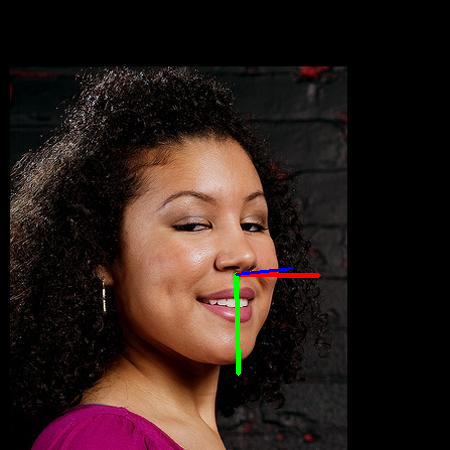

In [56]:
# choosing random image from the testing data
rand_image = 'image00420'
# detecting face and extracting the points
faceModule = mp.solutions.face_mesh
# loading image 
with faceModule.FaceMesh(static_image_mode=True) as faces:
  # loading the image
  image = cv2.imread('/content/AFLW2000/'+rand_image+'.jpg')
  # processing the face to extract the landmark points (468 point) for each x,y,z
  results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  if results.multi_face_landmarks != None: 
    # looping over the faces in the image
    for face in results.multi_face_landmarks:
        # initializing two lists to store the points for every face.
        x_array = []
        y_array = []
        # looping over the 468 points of x and y
        for landmark in face.landmark:
            x = landmark.x
            y = landmark.y
            # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
            shape = image.shape 
            relative_x = int(x * shape[1])
            relative_y = int(y * shape[0])
            #Xs of face
            x_array.append(relative_x)
            #Ys of face
            y_array.append(relative_y)

        # converting the x anx y to numpy arrays
        x_array = np.array(x_array)
        y_array = np.array(y_array)

        # centering the points arround the 99th point 
        x_center = x_array - x_array[99]
        y_center = y_array - y_array[99]

        # computing the distance
        distance = np.linalg.norm(np.array((x_array[10],y_array[10])) - np.array((x_array[171],y_array[171])),axis = 0)
        x_norm = x_center / distance
        y_norm = y_center / distance

        # concatinating the x and y points to predict the labels (pitch,yaw,roll)
        features = np.hstack([x_norm,y_norm]).reshape(1,-1)

        # predicting the 3 angels to draw the axis on the image
        pred_pitch = pitch_model.predict(features)
        pred_yaw = yaw_model.predict(features)
        pred_roll = roll_model.predict(features)
        cv2_imshow(draw_axis(image,pred_pitch,pred_yaw,pred_roll,x_array[99],y_array[99]))

In [53]:
# loading the test video
%%capture
!get clone https://github.com/osamashaaban/Head-Pose-Estimation

In [57]:
# Create a VideoCapture object and read from input file
def Create_TestVideo(pitch_model,yaw_model,roll_model,path):
  cap = cv2.VideoCapture(path)
  width= int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
  height= int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

  # Check if camera opened successfully
  if (cap.isOpened()== False): 
      print("Error opening video file")
  #a list to store the frames of the video  
  video_array = []
  # Read until video is completed
  while(cap.isOpened()):   
    # Capture frame-by-frame
      ret, frame = cap.read()
      if ret == True:
        # loading image 
        with faceModule.FaceMesh(static_image_mode=True) as faces:
          # processing the face to extract the landmark points (468 point) for each x,y,z
          results = faces.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
          if results.multi_face_landmarks != None: 
            # looping over the faces in the image
            for face in results.multi_face_landmarks:
                # initializing two lists to store the points for every face.
                x_array = []
                y_array = []
                # looping over the 468 points of x and y
                for landmark in face.landmark:
                    x = landmark.x
                    y = landmark.y
                    # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
                    shape = frame.shape 
                    relative_x = int(x * shape[1])
                    relative_y = int(y * shape[0])
                    #Xs of face
                    x_array.append(relative_x)
                    #Ys of face
                    y_array.append(relative_y)

                # converting the x anx y to numpy arrays
                x_array = np.array(x_array)
                y_array = np.array(y_array)

                # centering the points arround the 99th point 
                x_center = x_array - x_array[99]
                y_center = y_array - y_array[99]

                # computing the distance
                distance = np.linalg.norm(np.array((x_array[171],y_array[171])) - np.array((x_array[10],y_array[10])),axis = 0)
                x_norm = x_center / distance
                y_norm = y_center / distance

                # concatinating the x and y points to predict the labels (pitch,yaw,roll)
                features = np.hstack([x_norm,y_norm]).reshape(1,-1)

                # predicting the 3 angels to draw the axis on the image
                pred_pitch = pitch_model.predict(features)
                pred_yaw = yaw_model.predict(features)
                pred_roll = roll_model.predict(features)
                draw_axis(frame,pred_pitch,pred_yaw,pred_roll,x_array[99],y_array[99])
                # appending the result frames to the video_array list
                video_array.append(frame)
      else:
        break
  cap.release()  
  # Closes all the frames
  cv2.destroyAllWindows()
  print("Number of Detected Frames = ",len(video_array))
  # converting the frames to video
  out = cv2.VideoWriter('Test_video.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 20, (width,height))
  for i in range(len(video_array)):
    out.write(video_array[i])
  out.release()

In [58]:
path = "/content/Test_video.mp4" 
Create_TestVideo(pitch_model,yaw_model,roll_model,path)

Number of Detected Frames =  147


In [59]:
from google.colab import files
files.download('/content/Test_video.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
# cap = cv2.VideoCapture(0)
# with mp_face_mesh.FaceMesh(
#     max_num_faces=1,
#     refine_landmarks=True,
#     min_detection_confidence=0.5,
#     min_tracking_confidence=0.5) as face_mesh:
#   while cap.isOpened():
#     success, image = cap.read()
#     if not success:
#       print("Ignoring empty camera frame.")
#       # If loading a video, use 'break' instead of 'continue'.
#       continue

#     # To improve performance, optionally mark the image as not writeable to
#     # pass by reference.
#     image.flags.writeable = False
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     results = face_mesh.process(image)

#     # Draw the face mesh annotations on the image.
#     image.flags.writeable = True
#     image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#     if results.multi_face_landmarks:
#       for face_landmarks in results.multi_face_landmarks:
#         mp_drawing.draw_landmarks(
#             image=image,
#             landmark_list=face_landmarks,
#             connections=mp_face_mesh.FACEMESH_TESSELATION,
#             landmark_drawing_spec=None,
#             connection_drawing_spec=mp_drawing_styles
#             .get_default_face_mesh_tesselation_style())
#         mp_drawing.draw_landmarks(
#             image=image,
#             landmark_list=face_landmarks,
#             connections=mp_face_mesh.FACEMESH_CONTOURS,
#             landmark_drawing_spec=None,
#             connection_drawing_spec=mp_drawing_styles
#             .get_default_face_mesh_contours_style())
#         mp_drawing.draw_landmarks(
#             image=image,
#             landmark_list=face_landmarks,
#             connections=mp_face_mesh.FACEMESH_IRISES,
#             landmark_drawing_spec=None,
#             connection_drawing_spec=mp_drawing_styles
#             .get_default_face_mesh_iris_connections_style())
#     # Flip the image horizontally for a selfie-view display.
#     cv2.imshow('MediaPipe Face Mesh', cv2.flip(image, 1))
#     if cv2.waitKey(5) & 0xFF == 27:
#       break
# cap.release()